In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shaleen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shaleen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shaleen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Load data

In [3]:
df = pd.read_csv("spam_ham_dataset.csv", header= 0)

#### EDA & Profiling:

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [5]:
df.shape

(5171, 4)

In [6]:
len(df[df.label_num == 0])   # 0 represents ham mails

3672

In [7]:
len(df[df.label_num == 1])   # 1 represents spam mails

1499

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
#df.describe()

C:\Users\Shaleen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_num', ylabel='count'>

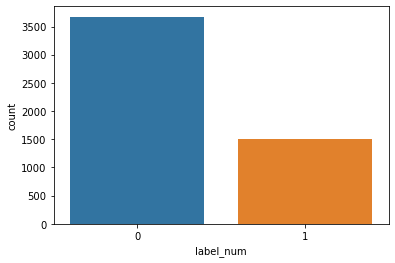

In [10]:
sns.countplot(df.label_num)

### cleaning and preprocessing:

In [11]:
#drop unwanted columns
df.drop(columns=['Unnamed: 0', 'label'], inplace=True)

In [12]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [13]:
# Normalization step : converting all mails in text column to lowercase
df['text'] = df['text'].str.lower()

In [14]:
# Tokenization:

def text_tokenize(txt):
    sent = word_tokenize(txt)
    return sent

In [15]:
df['text']

0       subject: enron methanol ; meter # : 988291\nth...
1       subject: hpl nom for january 9 , 2001\n( see a...
2       subject: neon retreat\nho ho ho , we ' re arou...
3       subject: photoshop , windows , office . cheap ...
4       subject: re : indian springs\nthis deal is to ...
                              ...                        
5166    subject: put the 10 on the ft\nthe transport v...
5167    subject: 3 / 4 / 2000 and following noms\nhpl ...
5168    subject: calpine daily gas nomination\n>\n>\nj...
5169    subject: industrial worksheets for august 2000...
5170    subject: important online banking alert\ndear ...
Name: text, Length: 5171, dtype: object

In [16]:
df['text'] = df['text'].apply(text_tokenize)

In [17]:
df.head()

,text,label_num
0,"[subject, :, enron, methanol, ;, meter, #, :, ...",0
1,"[subject, :, hpl, nom, for, january, 9, ,, 200...",0
2,"[subject, :, neon, retreat, ho, ho, ho, ,, we,...",0
3,"[subject, :, photoshop, ,, windows, ,, office,...",1
4,"[subject, :, re, :, indian, springs, this, dea...",0


In [18]:
#loading default stopwords list:

stop_words = nltk.corpus.stopwords.words('english')
added_stops = ['subject']
stop_words.extend(added_stops)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# removing stopwords:

df['text'] = df['text'].apply(lambda x: [word for word in x if not word in stop_words])

In [20]:
df.head()

,text,label_num
0,"[:, enron, methanol, ;, meter, #, :, 988291, f...",0
1,"[:, hpl, nom, january, 9, ,, 2001, (, see, att...",0
2,"[:, neon, retreat, ho, ho, ho, ,, ', around, w...",0
3,"[:, photoshop, ,, windows, ,, office, ., cheap...",1
4,"[:, :, indian, springs, deal, book, teco, pvr,...",0


In [21]:
# remove numbers

import re
pattern = r'[0-9]'
df['text'] = df['text'].apply(lambda x : [re.sub(pattern, "", y) for y in x])

In [22]:
df.head()

,text,label_num
0,"[:, enron, methanol, ;, meter, #, :, , follow,...",0
1,"[:, hpl, nom, january, , ,, , (, see, attached...",0
2,"[:, neon, retreat, ho, ho, ho, ,, ', around, w...",0
3,"[:, photoshop, ,, windows, ,, office, ., cheap...",1
4,"[:, :, indian, springs, deal, book, teco, pvr,...",0


In [23]:
puncts = {':', ',', ' ', ',,', ';', '.', '#', '@', '!', '(', ')', '&', '$', '"', '\'', '/', '\\', '{', '}', '-', '%', '=', '_', ''}

In [24]:
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in puncts])

In [25]:
df.head()

,text,label_num
0,"[enron, methanol, meter, follow, note, gave, m...",0
1,"[hpl, nom, january, see, attached, file, hplno...",0
2,"[neon, retreat, ho, ho, ho, around, wonderful,...",0
3,"[photoshop, windows, office, cheap, main, tren...",1
4,"[indian, springs, deal, book, teco, pvr, reven...",0


In [26]:
# Lemmatize the text:

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [27]:
df.head()

,text,label_num
0,"[enron, methanol, meter, follow, note, gave, m...",0
1,"[hpl, nom, january, see, attached, file, hplno...",0
2,"[neon, retreat, ho, ho, ho, around, wonderful,...",0
3,"[photoshop, window, office, cheap, main, trend...",1
4,"[indian, spring, deal, book, teco, pvr, revenu...",0


In [28]:
type(df['text'][0][0])

str

In [29]:
# Preparing for word cloud
lol = [w for w in df['text']] # lol: list of list  

# all_words for Word cloud
all_words = [item for sublist in lol for item in sublist] # to bring all the records together into a single list

In [30]:
#all_words

In [31]:
len(set(all_words))

43207

In [32]:
combined_to_single_string = " ".join(all_words)

In [33]:
#combined_to_single_string

In [34]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=2000, height=1500, collocations= False).generate(combined_to_single_string)

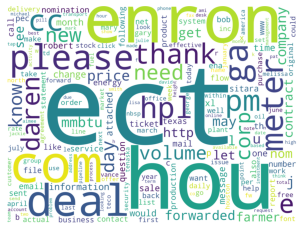

In [35]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
#wordcloud.words_

In [37]:
# Joining the list of strings in each row to form one string:

df['text'] = df['text'].apply(lambda x: " ".join(y for y in x))

In [38]:
df.head()

,text,label_num
0,enron methanol meter follow note gave monday p...,0
1,hpl nom january see attached file hplnol xl hp...,0
2,neon retreat ho ho ho around wonderful time ye...,0
3,photoshop window office cheap main trending ab...,1
4,indian spring deal book teco pvr revenue under...,0


#### Feature generation:

In [39]:
## using countvectorizer:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [40]:
# Building vocab and generating counts using fit_tansform

X = cv.fit_transform(df['text'])       # cv is an abbreviate for CountVectorizer here

In [41]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
X.shape

(5171, 43159)

In [43]:
# declaring target variable

y = df['label_num'].values

In [44]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [45]:
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

,aa,aaa,aabda,aabvmmq,aac,aachecar,aaer,aafco,aaiabe,aaigrcrb,...,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Train - test split:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4136, 43159), (1035, 43159), (4136,), (1035,))

#### Training a logistic regression:

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
pred_train_lr = lr.predict(X_train)

In [51]:
pred_test_lr = lr.predict(X_test)

##### Evaluation using Logistic Regression:

In [52]:
confusion_matrix(y_train, pred_train_lr)

array([[2928,    2],
       [   0, 1206]], dtype=int64)

In [53]:
confusion_matrix(y_test, pred_test_lr)

array([[731,  11],
       [  6, 287]], dtype=int64)

In [54]:
train_acc_lr = accuracy_score(y_train, pred_train_lr)
train_acc_lr

0.9995164410058027

In [55]:
# Accuracy on test set:

test_acc_lr = accuracy_score(y_test, pred_test_lr)
test_acc_lr

0.9835748792270531

In [56]:
print(classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



#### Lets quicky try one more model, say NaiveBayesClassifier

In [57]:
nb = MultinomialNB()
nb.fit(X_train , y_train)

MultinomialNB()

In [58]:
pred_train_nb = nb.predict(X_train)

In [59]:
pred_test_nb = nb.predict(X_test)

##### Evaluation using Naive Bayes Classifier:

In [60]:
confusion_matrix(y_train, pred_train_nb)

array([[2909,   21],
       [  33, 1173]], dtype=int64)

In [61]:
confusion_matrix(y_test, pred_test_nb)

array([[728,  14],
       [ 10, 283]], dtype=int64)

In [62]:
train_acc_nb = accuracy_score(y_train, pred_train_nb)
train_acc_nb

0.9869439071566731

In [63]:
# Accuracy on test set:

test_acc_nb= accuracy_score(y_test, pred_test_nb)
test_acc_nb

0.9768115942028985

In [64]:
print(classification_report(y_test, pred_test_nb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       742
           1       0.95      0.97      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [65]:
### Our Logistic regression worked better compared to NaiveBayes in our data setting!